In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
cd drive

/content/drive


In [0]:
ls

class.txt                            Our Product Draft/
Code/                                pascal_data/
Colab Notebooks/                     REFERENCES/
database/                            requirements.txt
Data Sets/                           Screen Shot 2018-07-02 at 8.38.24 PM.png
_detection reference/                testModel.ipynb
drive/                               tf1.png
Generating Enviornment Map (Reads)/  Timeline/
Initial tests/                       Untitled document.odt
Market Products and Raw Ideas/       VGG_tensorflow/
Model_one.py                         zs/
naya_folder_kuki naam nai sujh rha/


In [0]:
cd pascal_data

/content/drive/pascal_data


In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import keras

Using TensorFlow backend.


In [0]:
X = np.load('pascalX_val.npy')
Y = np.load('pascaly_val.npy')

print(X.shape)
print(Y.shape)

(4952, 300, 300, 3)
(4952, 20)


In [0]:
X = X/255

In [0]:
gandu = Sequential()

# Block 1
gandu.add(Conv2D(64, 3, 3,activation='relu',border_mode='same',name='Custom_block1_conv1',input_shape=(300,300,3)))
gandu.add(Conv2D(64, 3, 3,activation='relu',border_mode='same',name='block1_conv2',trainable=False))
gandu.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
gandu.add(Conv2D(128, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block2_conv1',trainable=False))

gandu.add(Conv2D(128, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block2_conv2',trainable=False))

gandu.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
gandu.add(Conv2D(256, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block3_conv1',trainable=False))
gandu.add(Conv2D(256, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block3_conv2',trainable=False))
gandu.add(Conv2D(256, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block3_conv3',trainable=False))
gandu.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
gandu.add(Conv2D(512, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block4_conv1',trainable=False))
gandu.add(Conv2D(512, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block4_conv2',trainable=False))
gandu.add(Conv2D(512, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block4_conv3',trainable=False))
gandu.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
gandu.add(Conv2D(512, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block5_conv1',trainable=False))
gandu.add(Conv2D(512, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block5_conv2',trainable=False))
gandu.add(Conv2D(512, 3, 3,
                      activation='relu',
                      border_mode='same',
                      name='block5_conv3',trainable=False))
gandu.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block5_pool'))
gandu.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Classification block
gandu.add(Flatten(name='flatten'))
gandu.add(Dense(4096, activation='relu', name='x_fc1'))
#gandu.add(Dense(4096, activation='relu', name='fc2'))
gandu.add(Dense(400, activation='relu', name='f_c2'))
gandu.add(Dense(20, activation='softmax', name='coustom_predictions'))






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="Custom_block1_conv1", input_shape=(300, 300,..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="block1_conv2", trainable=False, padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="block2_conv1", trainable=False, padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="block2_conv2", trainable=False, padding="same")`
/usr/local/lib/python3.6/dist-packages/ip

In [0]:
gandu.load_weights('gandu_weights13.h5')

In [0]:
k = np.zeros((1,300,300,3))

In [0]:
k[0] = X[56]

In [0]:
gandu.predict(k)

array([[4.1437129e-08, 6.7558554e-03, 4.1414972e-04, 2.3254824e-03,
        2.0243072e-04, 2.9637542e-06, 1.3974341e-05, 3.0737381e-05,
        6.1091132e-06, 1.7800758e-06, 8.4667892e-07, 2.3290713e-05,
        1.9529594e-05, 1.6646100e-02, 9.7353697e-01, 8.8961106e-06,
        9.6557289e-07, 9.6761705e-06, 5.4656519e-09, 9.8842698e-08]],
      dtype=float32)

In [0]:
Y[56]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [0]:
import matplotlib

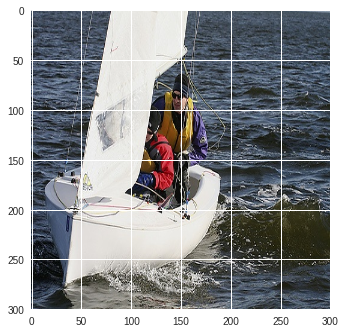

In [0]:
matplotlib.pyplot.imshow(X[56])

In [0]:
import cv2
alia = cv2.imread("testimagekk.jpg")
alia = cv2.resize(alia, (300, 300)) 
k[0] = alia / 255

In [0]:
gandu.predict(k)

array([[2.55812711e-06, 3.24608583e-04, 4.98483256e-02, 2.77397310e-04,
        3.02309613e-03, 4.29600777e-06, 3.02489261e-05, 2.53670616e-04,
        7.09186497e-05, 5.72226883e-04, 6.40492863e-06, 3.21878120e-02,
        6.35872006e-01, 6.90061308e-04, 2.74200201e-01, 1.49596735e-05,
        6.23473752e-05, 2.54429434e-03, 1.61931055e-07, 1.44183887e-05]],
      dtype=float32)

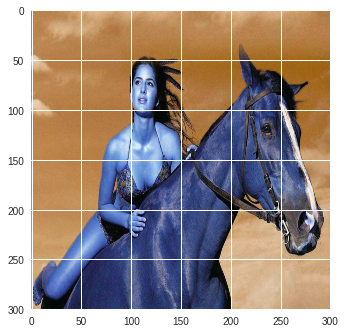

In [0]:
matplotlib.pyplot.imshow(k[0])